## 安裝 tensorflow、keras

In [1]:
# 確保使用的 tensorflow 是 1.x 版本而不是 tensorflow 2.x
import tensorflow as tf
print('tensorflow version:', tf.__version__)
#pip install tensorflow==1.14.0

tensorflow version: 1.14.0


In [2]:
# 需要安裝 keras 2.2.4 的版本 (pip install keras==2.2.4)
import keras
print('keras version:', keras.__version__)
#pip install keras==2.2.4

keras version: 2.2.4


Using TensorFlow backend.


## 下載程式碼、網路權重、資料集

In [ ]:
# 請先下載基於 keras 的 yolov3 程式碼
# 再把 keras-yolo3 放到 Day049-050_final_project 資料夾下
# 然後把 Day049-050_final_project.ipynb 放在 keras-yolo3 資料夾下並執行
!git clone https://github.com/qqwweee/keras-yolo3

In [3]:
# 下載 yolov3 的網路權重，並且把權重轉換為 keras 能夠讀取的格式
import os
if not os.path.exists("model_data/yolo.h5"):
    print("Model doesn't exist, downloading...")
    os.system("wget https://pjreddie.com/media/files/yolov3.weights")
    print("Converting yolov3.weights to yolo.h5...")
    os.system("python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5")
    print("Done!")
else:
    print("Model exist")

Model doesn't exist, downloading...
Converting yolov3.weights to yolo.h5...
Done!


In [4]:
# 下載測試資料
!mkdir test
!wget 'https://dehayf5mhw1h7.cloudfront.net/wp-content/uploads/sites/726/2017/08/03065555/Kangacoon-1024x768.jpg' -O 'test/Kangacoon1.jpg'

# 下載 raccoon 和 kangaroo 測試影片
!mkdir video
!wget -c 'https://cvdl-fileentity.cupoy.com/2nd/homework/example/1580979702432/Raccoon.mp4' -O 'video/Raccoon.mp4'
!wget -c 'https://cvdl-fileentity.cupoy.com/2nd/homework/example/1580979702432/Kangaroo.mp4' -O 'video/Kangaroo.mp4'

--2020-05-09 03:47:55--  https://dehayf5mhw1h7.cloudfront.net/wp-content/uploads/sites/726/2017/08/03065555/Kangacoon-1024x768.jpg
Resolving dehayf5mhw1h7.cloudfront.net (dehayf5mhw1h7.cloudfront.net)... 13.35.33.63, 13.35.33.161, 13.35.33.160, ...
Connecting to dehayf5mhw1h7.cloudfront.net (dehayf5mhw1h7.cloudfront.net)|13.35.33.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77112 (75K) [image/jpeg]
Saving to: ‘test/Kangacoon1.jpg’

test/Kangacoon1.jpg 100%[===================>]  75.30K  --.-KB/s    in 0.003s  

2020-05-09 03:47:56 (27.7 MB/s) - ‘test/Kangacoon1.jpg’ saved [77112/77112]

--2020-05-09 03:47:57--  https://cvdl-fileentity.cupoy.com/2nd/homework/example/1580979702432/Raccoon.mp4
Resolving cvdl-fileentity.cupoy.com (cvdl-fileentity.cupoy.com)... 13.35.37.78, 13.35.37.87, 13.35.37.20, ...
Connecting to cvdl-fileentity.cupoy.com (cvdl-fileentity.cupoy.com)|13.35.37.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1768

In [5]:
# 下載 raccoon 資料集
if not os.path.exists("raccoon_dataset"):
    print("raccoon_dataset doesn't exist, downloading...")
    !git clone https://github.com/experiencor/raccoon_dataset
else:
    print("raccoon_dataset exists")
    
# 下載 kangaroo 資料集
if not os.path.exists("kangaroo"):
    print("kangaroo doesn't exist, downloading...")
    !git clone https://github.com/experiencor/kangaroo
else:
    print("kangaroo exists")

raccoon_dataset doesn't exist, downloading...
Cloning into 'raccoon_dataset'...
remote: Enumerating objects: 646, done.
remote: Total 646 (delta 0), reused 0 (delta 0), pack-reused 646
Receiving objects: 100% (646/646), 48.00 MiB | 7.36 MiB/s, done.
Resolving deltas: 100% (412/412), done.
kangaroo doesn't exist, downloading...
Cloning into 'kangaroo'...
remote: Enumerating objects: 334, done.
remote: Total 334 (delta 0), reused 0 (delta 0), pack-reused 334
Receiving objects: 100% (334/334), 18.39 MiB | 5.03 MiB/s, done.
Resolving deltas: 100% (158/158), done.


## 把各自後 3% raccoon 和 kangaroo 資料集當測試資料

In [6]:
import numpy as np
import shutil

images_path = ['./raccoon_dataset/images/', './kangaroo/images/']  # image 路徑

for i, img in enumerate(images_path):  # img 跑 raccoon 和 kangaroo 的 images
    image_ids = os.listdir(img)  # 該 images 路徑下的檔案
    image_ids.sort()  # 檔案名稱由小排到大
    image_ids_size = len(image_ids)  # 該 images 路徑下有多少檔案
    split_num = int(np.round(image_ids_size*0.97))  # 每個資料集的後 3% 當測試集
    test_data = image_ids[split_num:]  # test 拿後 3% 筆資料
    
    for j in range(len(test_data)):
        shutil.move(img+test_data[j], 'test')
    print('Move done!')
    
    print('test_data from', img, ':', len(test_data))
    print(test_data)
    if i == 0:
        print('')

Move done!
test_data from ./raccoon_dataset/images/ : 6
['raccoon-94.jpg', 'raccoon-95.jpg', 'raccoon-96.jpg', 'raccoon-97.jpg', 'raccoon-98.jpg', 'raccoon-99.jpg']

Move done!
test_data from ./kangaroo/images/ : 5
['00179.jpg', '00180.jpg', '00181.jpg', '00182.jpg', '00183.jpg']


## 把 raccoon 和 kangaroo 資料集轉換為訓練YOLO模型時需要的格式: image_file_path x_min,y_min,x_max,y_max,class_id
#### 參考 https://github.com/qqwweee/keras-yolo3/blob/master/voc_annotation.py

In [7]:
# 訓練模型時所使用的，已經做好轉換的 annotation 檔名，增加這個檢查避免每次重新跑這段轉換的程式碼
if not os.path.exists("animals_train.txt"):
    import xml.etree.ElementTree as ET  # 載入能夠 Parser xml 文件的 library
    from os import getcwd
    
    sets = ['train', 'val']  # 分為訓練集和驗證集
    classes = ["raccoon", "kangaroo"]  # raccoon(第0類) 和 kangaroo(第1類) 的資料類別
    annots_path = ['./raccoon_dataset/annotations/', './kangaroo/annots/']  # annotation 路徑
    images_path = ['./raccoon_dataset/images/', './kangaroo/images/']  # image 路徑
    
    # 把 annotation 轉換訓練時需要的資料形態
    def convert_annotation(annots_path, image_id, list_file):
        in_file = open('%s%s.xml'%(annots_path, image_id))
        tree = ET.parse(in_file)
        root = tree.getroot()
        
        for obj in root.iter('object'):
            difficult = obj.find('difficult').text
            cls = obj.find('name').text
            if cls not in classes or int(difficult)==1:
                continue
                
            cls_id = classes.index(cls)  # cls 分類至 cls_id(0 或 1)
            xmlbox = obj.find('bndbox')  # xmlbox 顯示影像方框(bounding box)
            b = (int(xmlbox.find('xmin').text), int(xmlbox.find('ymin').text), 
                 int(xmlbox.find('xmax').text), int(xmlbox.find('ymax').text))
            
            list_file.write(" " + ",".join([str(a) for a in b]) + ',' + str(cls_id))
            
    for image_set in sets:  # 跑 train 和 val
        annotation_path = 'animals_%s.txt'%(image_set)
        list_file = open(annotation_path, 'w')  # 開檔+寫檔
        print("save annotation at %s" % annotation_path)
        
        for i, annots in enumerate(annots_path):  # i 跑 0 和 1，annots 跑 raccoon 和 kangaroo 的 annotation 路徑
            #print(len([name for name in os.listdir(annots) if os.path.isfile(os.path.join(annots, name))]))
            image_ids = os.listdir(annots)  # 該 annotation 路徑下的檔案
            image_ids.sort()  # 檔案名稱由小排到大
            image_ids_size = len(image_ids)  # 該 annotation 路徑下有多少檔案
            split_num = int(np.round(image_ids_size*0.8))  # 每個資料集的前 80% 當訓練集，後 20% 當驗證集
            
            if image_set == 'train':
                data = image_ids[:split_num]  # train 拿前 80% 筆資料
            else:
                data = image_ids[split_num:]  # val 拿後 20% 筆資料
                
            for image_id in data:  # 跑 xml 的 id
                xml_name = image_id.split('.')[0]  # 用'.'切割字串，然後取 .xml 前面的名稱
                list_file.write('%s%s.jpg'%(images_path[i], xml_name))  # train 和 val 各別 跑 0 和 1 的 image 路徑
                convert_annotation(annots, xml_name, list_file)  # 呼叫上面定義的函式
                list_file.write('\n')
                
        list_file.close()  # 關檔(與開檔要對應位置)

save annotation at animals_train.txt
save annotation at animals_val.txt


In [8]:
filename = 'animals_train.txt'
file = open(filename)
print(filename, 'has', len(file.readlines()), 'datas')

with open(filename, 'r') as f:
  d = f.readlines()
d

animals_train.txt has 291 datas


['./raccoon_dataset/images/raccoon-1.jpg 81,88,522,408,0\n',
 './raccoon_dataset/images/raccoon-10.jpg 130,2,446,488,0\n',
 './raccoon_dataset/images/raccoon-100.jpg 548,10,954,520,0\n',
 './raccoon_dataset/images/raccoon-101.jpg 86,53,400,356,0\n',
 './raccoon_dataset/images/raccoon-102.jpg 1,1,118,152,0\n',
 './raccoon_dataset/images/raccoon-103.jpg 92,54,460,545,0\n',
 './raccoon_dataset/images/raccoon-104.jpg 189,41,340,249,0\n',
 './raccoon_dataset/images/raccoon-105.jpg 250,49,714,869,0\n',
 './raccoon_dataset/images/raccoon-106.jpg 31,21,226,146,0\n',
 './raccoon_dataset/images/raccoon-107.jpg 165,51,496,590,0\n',
 './raccoon_dataset/images/raccoon-108.jpg 99,53,402,464,0\n',
 './raccoon_dataset/images/raccoon-109.jpg 9,1,177,252,0\n',
 './raccoon_dataset/images/raccoon-11.jpg 3,1,461,431,0\n',
 './raccoon_dataset/images/raccoon-110.jpg 23,2,166,262,0\n',
 './raccoon_dataset/images/raccoon-111.jpg 41,5,683,917,0\n',
 './raccoon_dataset/images/raccoon-112.jpg 131,174,775,563,0\n'

In [9]:
filename = 'animals_val.txt'
file = open(filename)
print(filename, 'has', len(file.readlines()), 'datas')

with open(filename, 'r') as f:
  d = f.readlines()
d

animals_val.txt has 73 datas


['./raccoon_dataset/images/raccoon-63.jpg 74,107,280,290,0 227,93,403,298,0\n',
 './raccoon_dataset/images/raccoon-64.jpg 1,1,247,194,0\n',
 './raccoon_dataset/images/raccoon-65.jpg 123,27,338,284,0\n',
 './raccoon_dataset/images/raccoon-66.jpg 220,37,697,440,0\n',
 './raccoon_dataset/images/raccoon-67.jpg 18,17,224,168,0\n',
 './raccoon_dataset/images/raccoon-68.jpg 1,24,517,423,0\n',
 './raccoon_dataset/images/raccoon-69.jpg 12,11,188,240,0\n',
 './raccoon_dataset/images/raccoon-7.jpg 92,79,271,264,0\n',
 './raccoon_dataset/images/raccoon-70.jpg 60,4,421,369,0\n',
 './raccoon_dataset/images/raccoon-71.jpg 129,51,628,373,0\n',
 './raccoon_dataset/images/raccoon-72.jpg 219,195,446,375,0 98,34,284,336,0\n',
 './raccoon_dataset/images/raccoon-73.jpg 56,16,274,166,0\n',
 './raccoon_dataset/images/raccoon-74.jpg 141,6,472,505,0\n',
 './raccoon_dataset/images/raccoon-75.jpg 1,1,640,459,0\n',
 './raccoon_dataset/images/raccoon-76.jpg 14,1,212,132,0\n',
 './raccoon_dataset/images/raccoon-77.j

## 載入套件

In [10]:
# 將 train.py 所需要的套件載入
import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from yolo3.model import preprocess_true_boxes, yolo_body, tiny_yolo_body, yolo_loss
from yolo3.utils import get_random_data

from train import get_classes, get_anchors, create_model, create_tiny_model, data_generator, data_generator_wrapper

## 把 YOLO weights 轉換為能夠提供給 keras 作為訓練新模型的初始權重
#### 注意這部分多了一個 -w 的參數 可參考 https://github.com/qqwweee/keras-yolo3/blob/master/convert.py#L242 和 https://stackoverflow.com/questions/42621864/difference-between-keras-model-save-and-model-save-weights

In [11]:
if not os.path.exists("model_data/yolo_weights.h5"):
    print("Converting pretrained YOLOv3 weights for training")
    # '-w': 代表只轉換 yolov3.weights 到 model_data/yolo_weights.h5
    os.system("python convert.py -w yolov3.cfg yolov3.weights model_data/yolo_weights.h5")
    print("Done!")
else:
    print("Pretrained weights exists")

Converting pretrained YOLOv3 weights for training
Done!


## 訓練模型

In [12]:
# 不加以下兩行會有 OSError: image file is truncated (25 bytes not processed)
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# 設定訓練資料的來源位置
annotation_path = 'animals_train.txt'  # 轉換好格式的 train 標註檔案
log_dir = 'logs/000/'  # 訓練好的模型要儲存的路徑
classes_path = 'model_data/animals_classes.txt'
anchors_path = 'model_data/yolo_anchors.txt'

class_names = get_classes(classes_path)
num_classes = len(class_names)
anchors = get_anchors(anchors_path)

# 模型參數的設定，並設定 logging, checkpoint, reduce_lr, early_stopping
input_shape = (416, 416)  # multiple of 32, hw
is_tiny_version = len(anchors)==6 # default setting

if is_tiny_version:
    model = create_tiny_model(input_shape, anchors, num_classes, 
                              freeze_body=2, weights_path='model_data/tiny_yolo_weights.h5')
else:
    model = create_model(input_shape, anchors, num_classes, 
                         freeze_body=2, weights_path='model_data/yolo_weights.h5') # make sure you know what you freeze

logging = TensorBoard(log_dir=log_dir)

checkpoint = ModelCheckpoint(log_dir + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5', 
                             monitor='val_loss', 
                             save_weights_only=True, 
                             save_best_only=True, 
                             period=3)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.1, 
                              patience=10,  # 3
                              verbose=1)

early_stopping = EarlyStopping(monitor='val_loss', 
                               min_delta=0.001,  # 0
                               patience=20,  # 10
                               verbose=1)

# 分為 training 以及 validation
val_split = 0.25  # train:val = 80%:20% = 4:1

with open(annotation_path) as f:
    lines = f.readlines()
    
np.random.seed(10101)
np.random.shuffle(lines)
np.random.seed(None)

num_val = int(len(lines)*val_split)
num_train = len(lines) - num_val

# 第一階段訓練
# Train with frozen layers first, to get a stable loss.
# Adjust num epochs to your dataset. This step is enough to obtain a not bad model.
# 一開始先 freeze YOLO 除了 output layer 以外的 darknet53 backbone 來 train
if True:
    model.compile(optimizer=Adam(lr=1e-3),
                  loss={'yolo_loss': lambda y_true, y_pred: y_pred})  # use custom yolo_loss Lambda layer
    print('\n第一階段訓練')
    
    batch_size = 16  # 5
    print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
    
    # 模型利用 generator 產生的資料做訓練，強烈建議大家去閱讀及理解 data_generator_wrapper 在 train.py 中的實現
    model_1 = model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes), 
                                  steps_per_epoch=max(1, num_train//batch_size), 
                                  validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes), 
                                  validation_steps=max(1, num_val//batch_size), 
                                  epochs=50, 
                                  initial_epoch=0, 
                                  callbacks=[logging, checkpoint])
    
    model.save_weights(log_dir + 'trained_weights_stage_1.h5')

# 第二階段訓練
# Unfreeze and continue training, to fine-tune.
# Train longer if the result is not good.
if True:
    # 把所有 layer 都改為 trainable
    for i in range(len(model.layers)):
        model.layers[i].trainable = True
    
    model.compile(optimizer=Adam(lr=1e-4),
                  loss={'yolo_loss': lambda y_true, y_pred: y_pred})  # recompile to apply the change
    print('\n第二階段訓練: Unfreeze all of the layers.')

    batch_size = 8  # 3 # note that more GPU memory is required after unfreezing the body
    print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
    
    model_2 = model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes), 
                                  steps_per_epoch=max(1, num_train//batch_size), 
                                  validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes), 
                                  validation_steps=max(1, num_val//batch_size), 
                                  epochs=100, 
                                  initial_epoch=50, 
                                  callbacks=[logging, checkpoint, reduce_lr, early_stopping])
    
    model.save_weights(log_dir + 'trained_weights_final.h5')

W0509 03:50:42.371116 139924302387008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0509 03:50:42.371697 139924302387008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0509 03:50:42.383591 139924302387008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0509 03:50:42.384140 139924302387008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W050

Create YOLOv3 model with 9 anchors and 2 classes.


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_59 due to mismatch in shape ((1, 1, 1024, 21) vs (255, 1024, 1, 1)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_59 due to mismatch in shape ((21,) vs (255,)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_67 due to mismatch in shape ((1, 1, 512, 21) vs (255, 512, 1, 1)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_67 due to mismatch in shape ((21,) vs (255,)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_75 due to mismatch in shape ((1,

Load weights model_data/yolo_weights.h5.
Freeze the first 249 layers of total 252 layers.


W0509 03:50:55.395975 139924302387008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.




第一階段訓練
Train on 219 samples, val on 72 samples, with batch size 16.


W0509 03:50:56.536683 139924302387008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0509 03:50:56.537232 139924302387008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/callbacks.py:853: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



Epoch 1/50
13/13 [==============================] - 72s 6s/step - loss: 5645.3779 - val_loss: 2496.9082
Epoch 2/50
13/13 [==============================] - 66s 5s/step - loss: 1450.3811 - val_loss: 753.9174
Epoch 3/50
13/13 [==============================] - 66s 5s/step - loss: 537.8427 - val_loss: 358.4483
Epoch 4/50
13/13 [==============================] - 66s 5s/step - loss: 313.5518 - val_loss: 236.9481
Epoch 5/50
13/13 [==============================] - 66s 5s/step - loss: 232.0148 - val_loss: 196.4912
Epoch 6/50
13/13 [==============================] - 66s 5s/step - loss: 183.2032 - val_loss: 150.7867
Epoch 7/50
13/13 [==============================] - 66s 5s/step - loss: 159.2493 - val_loss: 138.1043
Epoch 8/50
13/13 [==============================] - 66s 5s/step - loss: 139.0645 - val_loss: 111.1657
Epoch 9/50
13/13 [==============================] - 66s 5s/step - loss: 125.7124 - val_loss: 109.0735
Epoch 10/50
13/13 [==============================] - 66s 5s/step - loss: 111.58

27/27 [==============================] - 269s 10s/step - loss: 13.4682 - val_loss: 15.1451
Epoch 81/100
27/27 [==============================] - 269s 10s/step - loss: 13.3543 - val_loss: 15.1451
Epoch 82/100
27/27 [==============================] - 268s 10s/step - loss: 13.7350 - val_loss: 14.8699
Epoch 83/100
27/27 [==============================] - 268s 10s/step - loss: 13.3096 - val_loss: 14.9471
Epoch 84/100
27/27 [==============================] - 268s 10s/step - loss: 13.5396 - val_loss: 15.8010
Epoch 85/100
27/27 [==============================] - 268s 10s/step - loss: 13.6354 - val_loss: 15.2508
Epoch 86/100
27/27 [==============================] - 268s 10s/step - loss: 13.8042 - val_loss: 15.0749
Epoch 87/100
27/27 [==============================] - 268s 10s/step - loss: 13.2479 - val_loss: 15.0664

Epoch 00087: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
Epoch 88/100
27/27 [==============================] - 268s 10s/step - loss: 13.4722 - val_loss: 15.3

## 分析模型

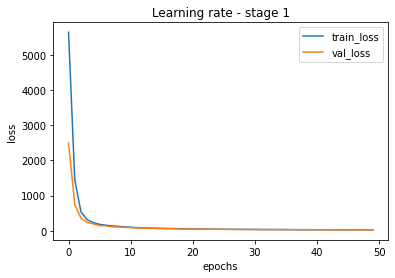

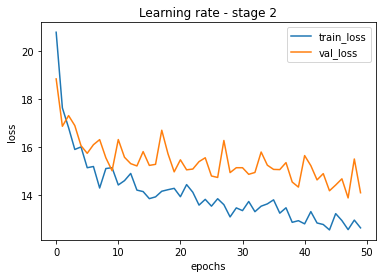

In [13]:
# 畫出訓練過程中 loss 與 val_loss 的變化
import matplotlib.pyplot as plt
%matplotlib inline

# 第一階段訓練
plt.title('Learning rate - stage 1')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(model_1.history["loss"], label="train_loss")
plt.plot(model_1.history["val_loss"], label="val_loss")
plt.legend(loc='upper right')
plt.show()

# 第二階段訓練
plt.title('Learning rate - stage 2')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(model_2.history["loss"], label="train_loss")
plt.plot(model_2.history["val_loss"], label="val_loss")
plt.legend(loc='upper right')
plt.show()

## 測試影像

logs/000/trained_weights_final.h5 model, anchors, and classes loaded.
(416, 416, 3)
Found 3 boxes for img
kangaroo 0.51 (199, 138) (280, 298)
kangaroo 0.57 (92, 190) (196, 287)
kangaroo 0.77 (15, 134) (123, 299)
1.733441927935928


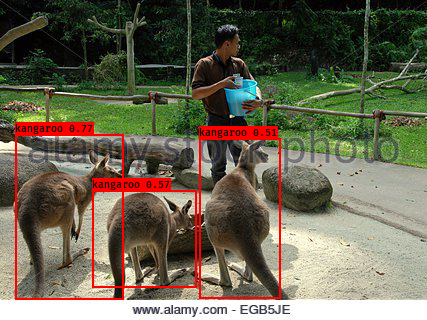

(416, 416, 3)
Found 1 boxes for img
kangaroo 1.00 (99, 48) (344, 376)
0.23792759596835822


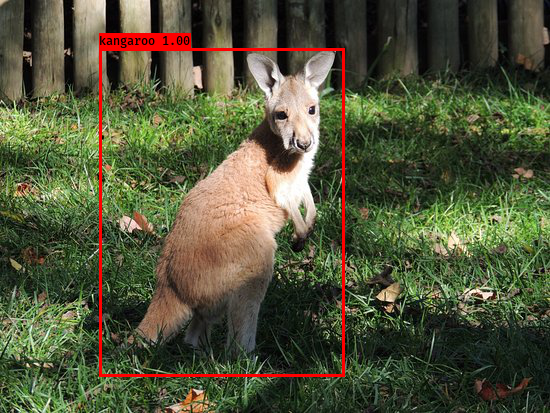

(416, 416, 3)
Found 2 boxes for img
kangaroo 1.00 (0, 76) (434, 730)
raccoon 1.00 (428, 37) (1024, 746)
0.24999108794145286


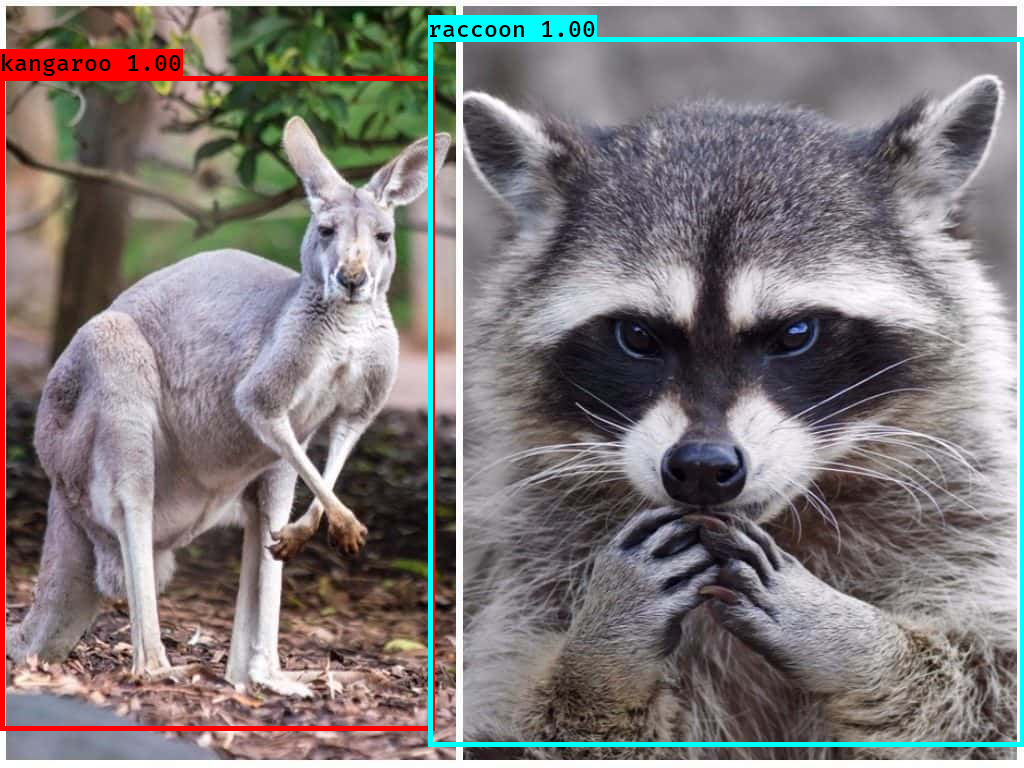

(416, 416, 3)
Found 1 boxes for img
kangaroo 0.99 (269, 40) (621, 264)
0.23462893697433174


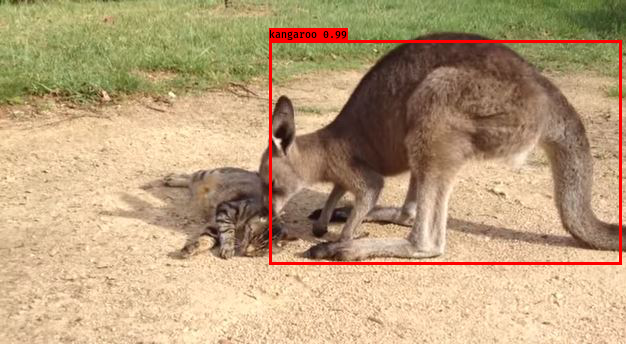

(416, 416, 3)
Found 1 boxes for img
raccoon 0.99 (22, 33) (127, 228)
0.22785455302800983


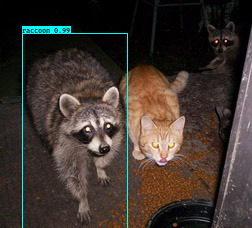

(416, 416, 3)
Found 3 boxes for img
kangaroo 0.52 (215, 220) (460, 344)
raccoon 0.42 (215, 220) (460, 344)
raccoon 0.95 (0, 33) (376, 303)
0.24360251298639923


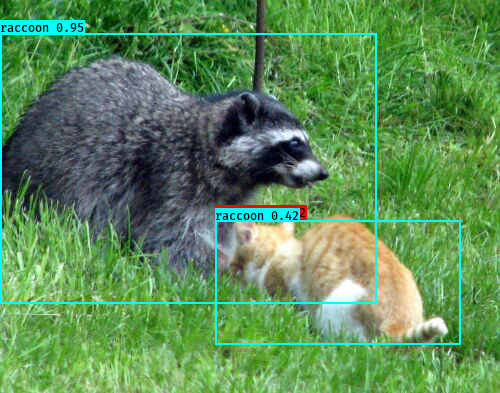

(416, 416, 3)
Found 1 boxes for img
raccoon 1.00 (12, 15) (248, 386)
0.23862303199712187


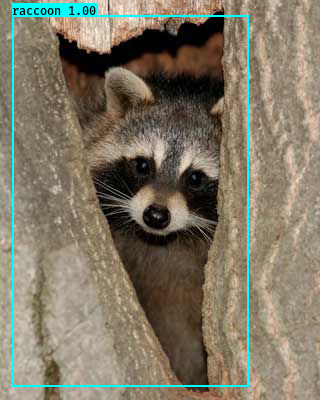

(416, 416, 3)
Found 1 boxes for img
raccoon 0.98 (116, 9) (315, 296)
0.23811252799350768


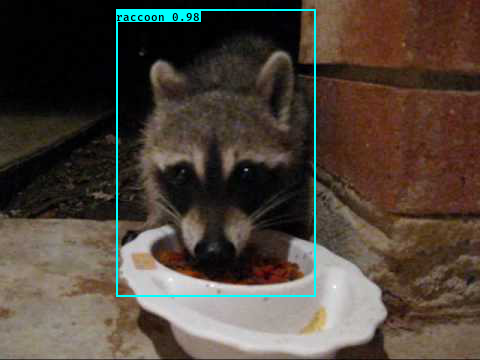

(416, 416, 3)
Found 1 boxes for img
raccoon 1.00 (38, 18) (224, 203)
0.2320461549097672


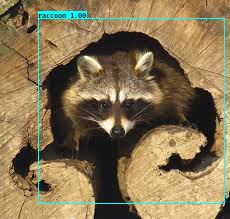

(416, 416, 3)
Found 1 boxes for img
kangaroo 0.99 (233, 164) (598, 413)
0.24255694902967662


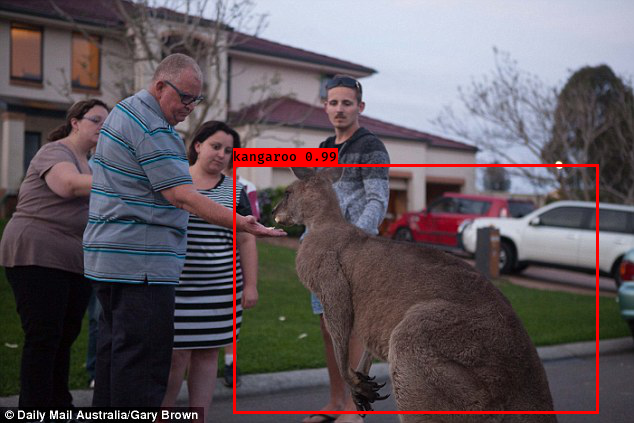

(416, 416, 3)
Found 1 boxes for img
kangaroo 0.98 (41, 19) (577, 423)
0.24314225104171783


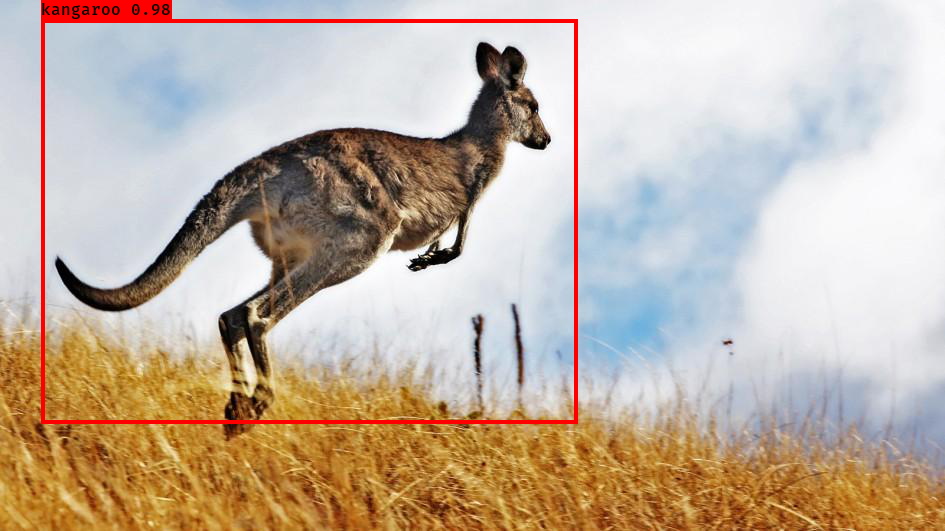

(416, 416, 3)
Found 1 boxes for img
raccoon 1.00 (158, 0) (529, 467)
0.2396289500175044


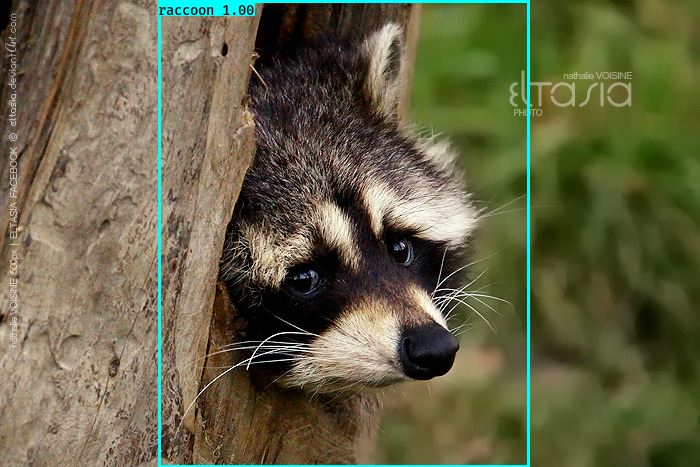

In [14]:
from yolo import YOLO
yolo_model = YOLO(model_path=log_dir+'trained_weights_final.h5', classes_path=classes_path)

from PIL import Image
from IPython import display

for img_file in os.listdir('test'):
    image = Image.open(os.path.join('test/', img_file))  # 讀取範例圖片
    r_image = yolo_model.detect_image(image)  # 執行 yolo 檢測，將回傳的圖片儲存在 r_image 中
    display.display(r_image)  # 顯示 r_image，可觀察到圖片上已畫上 yolov3 所檢測的 object

## 偵測影片
#### 參考 https://github.com/qqwweee/keras-yolo3/blob/master/yolo.py 的 detect_video 函式

In [15]:
from yolo import YOLO
import numpy as np
import time
import cv2
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

log_dir = 'logs/000/' # 訓練好的模型要儲存的路徑
classes_path = 'model_data/animals_classes.txt'

yolo_model = YOLO(model_path=log_dir+'trained_weights_final.h5', classes_path=classes_path)

def detect_video(yolo, video_path, output_path=""):
    # 透過 OpenCV 擷取影像
    import cv2
    vid = cv2.VideoCapture(video_path)
    if not vid.isOpened():
        raise IOError("Couldn't open webcam or video!")
        
    # 取得影像的基本資訊
    video_FourCC = int(vid.get(cv2.CAP_PROP_FOURCC))
    video_FourCC = cv2.VideoWriter_fourcc(*'MP4V')  # 指定 video 編碼方式(mp4)
    video_fps = vid.get(cv2.CAP_PROP_FPS)  # 總共有多少 frames
    video_size = (int(vid.get(cv2.CAP_PROP_FRAME_WIDTH)),   # 每個 frame 的寬
                  int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT)))  # 每個 frame 的高
    
    # 設定影像的輸出
    isOutput = True if output_path != "" else False
    if isOutput:
        out = cv2.VideoWriter(output_path, video_FourCC, video_fps, video_size)
    
    # 初始化設定
    video_cnt = 0  
    video_playtime = []  
    
    # 迭代每個 frame 來進行影像偵測
    while True:
        return_value, frame = vid.read() # 讀取每個 frame
        video_cnt += 1 
        
        # 先把每個 frame 分開偵測，再把偵測完的 frames 串接回影片，最後輸出偵測好的影片
        if return_value == True: 
            image = Image.fromarray(frame)
            start_time = time.time() 
            image = yolo.detect_image(image)  # 直接使用 yolo.py 的 detect_image 函式
            end_time = time.time()
            time_img = end_time - start_time  
            video_playtime.append(round(time_img, 3)) 
            result = np.asarray(image)
            cv2.putText(result, text='fps', org=(3, 15), fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                        fontScale=0.50, color=(255, 0, 0), thickness=2)
            if isOutput:
                out.write(result)
        else:  
            break
            
    # 釋放資源
    vid.release()  # release input video resource
    out.release()  # release output video resource
    
    return video_playtime, video_cnt 

logs/000/trained_weights_final.h5 model, anchors, and classes loaded.


In [16]:
# 偵測 Kangaroo.mp4
video_playtime, video_cnt = detect_video(yolo_model, video_path='video/Kangaroo.mp4', output_path="video/Kangaroo_out.mp4")
print('\nKangaroo.mp4 total frames:', video_cnt)  # 總共有多少 frames

avg_fps = 1/np.mean(video_playtime)
print("Kangaroo.mp4 avg fps: %.3f" % avg_fps)  # 平均 fps

(416, 416, 3)
Found 2 boxes for img
kangaroo 0.52 (252, 0) (1269, 720)
kangaroo 0.93 (0, 0) (544, 682)
1.9077527479967102
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.52 (251, 0) (1269, 720)
kangaroo 0.91 (2, 0) (544, 687)
0.23466720699798316
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.56 (371, 0) (1280, 720)
kangaroo 0.94 (4, 0) (537, 671)
0.24709530593827367
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.98 (4, 2) (519, 661)
0.24445625802036375
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.34 (265, 0) (1254, 720)
kangaroo 0.94 (1, 3) (521, 654)
0.2470267709577456
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.40 (225, 0) (1280, 720)
kangaroo 0.97 (25, 13) (506, 573)
0.24219903198536485
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.98 (21, 16) (515, 566)
0.24439757701475173
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.96 (37, 22) (503, 551)
0.24193233205005527
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.93 (44, 11) (489, 555)
0.24321673798840493
(416, 416, 3)
Found 1 boxes

Found 2 boxes for img
kangaroo 0.36 (267, 121) (590, 568)
kangaroo 0.49 (702, 440) (938, 643)
0.24677823693491518
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.36 (267, 122) (591, 566)
kangaroo 0.50 (702, 442) (938, 640)
0.25121554103679955
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.37 (264, 121) (593, 569)
kangaroo 0.51 (700, 433) (941, 648)
0.2437461978988722
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.38 (701, 427) (943, 651)
kangaroo 0.38 (262, 118) (596, 572)
0.24663629301358014
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.37 (703, 429) (941, 648)
kangaroo 0.39 (262, 117) (598, 571)
0.24513881804887205
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.38 (703, 430) (943, 647)
kangaroo 0.39 (263, 118) (597, 571)
0.24880634306464344
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.38 (703, 431) (943, 646)
kangaroo 0.38 (263, 119) (597, 571)
0.24680707696825266
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.39 (703, 424) (945, 654)
kangaroo 0.42 (262, 119) (598, 571)
0.245576850

Found 2 boxes for img
kangaroo 0.79 (547, 28) (1058, 656)
raccoon 0.68 (532, 16) (1002, 589)
0.24608428601641208
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.80 (555, 30) (1053, 652)
raccoon 0.61 (533, 14) (1004, 592)
0.24959914304781705
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.83 (554, 31) (1054, 653)
raccoon 0.64 (533, 15) (1005, 590)
0.24687014997471124
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.85 (554, 31) (1055, 653)
raccoon 0.63 (533, 15) (1005, 590)
0.24457649898249656
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.88 (550, 28) (1058, 659)
raccoon 0.54 (533, 13) (1005, 592)
0.2451014369726181
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.83 (548, 24) (1060, 658)
raccoon 0.63 (536, 5) (1002, 599)
0.24114467797335237
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.88 (551, 26) (1059, 656)
raccoon 0.55 (536, 6) (1003, 598)
0.24524575495161116
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.78 (550, 22) (1059, 655)
raccoon 0.67 (536, 4) (1002, 600)
0.24443065107334405
(4

Found 1 boxes for img
kangaroo 0.89 (355, 38) (902, 648)
0.24502592405769974
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.94 (359, 36) (893, 654)
0.24015693692490458
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.34 (54, 0) (997, 720)
kangaroo 0.87 (363, 32) (884, 650)
0.2514989769551903
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.35 (53, 0) (997, 720)
kangaroo 0.87 (362, 32) (885, 651)
0.24696665292140096
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.83 (356, 26) (893, 650)
0.2423776969080791
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.89 (368, 29) (868, 652)
0.24485658295452595
(416, 416, 3)
Found 0 boxes for img
0.23793426505289972
(416, 416, 3)
Found 0 boxes for img
0.2405710129532963
(416, 416, 3)
Found 0 boxes for img
0.2418222789419815
(416, 416, 3)
Found 0 boxes for img
0.24248635000549257
(416, 416, 3)
Found 0 boxes for img
0.24332539702299982
(416, 416, 3)
Found 0 boxes for img
0.2416695290012285
(416, 416, 3)
Found 0 boxes for img
0.23862133000511676
(416, 416, 3)
F

Found 3 boxes for img
kangaroo 0.43 (356, 128) (698, 379)
kangaroo 0.63 (474, 184) (673, 393)
kangaroo 0.87 (111, 42) (311, 442)
0.24941540299914777
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.39 (463, 179) (686, 396)
kangaroo 0.62 (106, 51) (314, 441)
0.24409484304487705
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.41 (465, 180) (684, 396)
kangaroo 0.63 (108, 52) (312, 440)
0.24476321192923933
(416, 416, 3)
Found 3 boxes for img
kangaroo 0.31 (349, 127) (694, 377)
kangaroo 0.50 (476, 175) (676, 402)
kangaroo 0.59 (109, 52) (311, 446)
0.24712942400947213
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.39 (346, 125) (692, 374)
kangaroo 0.54 (110, 63) (309, 439)
0.24148063210304826
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.37 (348, 122) (691, 377)
kangaroo 0.43 (64, 109) (359, 419)
0.24840507504995912
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.49 (53, 140) (373, 431)
0.24253434990532696
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.46 (54, 139) (371, 432)
0.2481669989647343

Found 2 boxes for img
kangaroo 0.55 (1036, 413) (1252, 525)
kangaroo 0.85 (683, 354) (908, 526)
0.2460835400270298
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.94 (705, 377) (928, 503)
0.24762039596680552
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.88 (727, 382) (934, 498)
0.24283870693761855
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.92 (755, 367) (942, 505)
0.2446493119932711
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.66 (799, 369) (965, 503)
0.24518958199769258
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.65 (801, 371) (963, 503)
0.24227360798977315
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.93 (815, 352) (995, 502)
0.24411135504487902
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.38 (910, 106) (984, 200)
kangaroo 0.93 (835, 350) (1010, 506)
0.24529818398877978
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.68 (852, 355) (1010, 488)
0.24364341609179974
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.89 (866, 338) (1060, 494)
0.24153632705565542
(416, 416, 3)
Found

Found 3 boxes for img
kangaroo 0.33 (540, 367) (937, 720)
kangaroo 0.47 (2, 111) (178, 424)
kangaroo 0.53 (690, 233) (917, 467)
0.25208960904274136
(416, 416, 3)
Found 3 boxes for img
kangaroo 0.37 (525, 368) (954, 720)
kangaroo 0.45 (0, 53) (194, 439)
kangaroo 0.52 (698, 240) (912, 463)
0.24917236110195518
(416, 416, 3)
Found 3 boxes for img
kangaroo 0.43 (524, 374) (960, 720)
kangaroo 0.44 (0, 53) (195, 439)
kangaroo 0.51 (701, 222) (913, 481)
0.2484975450206548
(416, 416, 3)
Found 3 boxes for img
kangaroo 0.36 (527, 366) (969, 720)
kangaroo 0.47 (0, 105) (205, 435)
kangaroo 0.52 (697, 223) (925, 479)
0.24634636810515076
(416, 416, 3)
Found 3 boxes for img
kangaroo 0.31 (526, 367) (969, 720)
kangaroo 0.49 (694, 220) (933, 481)
kangaroo 0.49 (0, 105) (204, 433)
0.24998881202191114
(416, 416, 3)
Found 3 boxes for img
kangaroo 0.32 (525, 367) (969, 720)
kangaroo 0.49 (694, 220) (933, 480)
kangaroo 0.49 (0, 105) (205, 433)
0.248371961992234
(416, 416, 3)
Found 3 boxes for img
kangaroo 0.

Found 2 boxes for img
kangaroo 0.44 (0, 0) (443, 700)
kangaroo 0.98 (713, 44) (1097, 672)
0.24657114502042532
(416, 416, 3)
Found 4 boxes for img
kangaroo 0.46 (481, 382) (806, 590)
kangaroo 0.93 (966, 412) (1174, 578)
kangaroo 0.96 (175, 412) (676, 616)
kangaroo 0.96 (0, 349) (188, 624)
0.2520407190313563
(416, 416, 3)
Found 4 boxes for img
kangaroo 0.46 (481, 382) (806, 590)
kangaroo 0.93 (966, 412) (1174, 578)
kangaroo 0.96 (175, 412) (676, 616)
kangaroo 0.96 (0, 349) (188, 624)
0.2522012849804014
(416, 416, 3)
Found 4 boxes for img
kangaroo 0.53 (447, 340) (811, 617)
kangaroo 0.91 (217, 383) (667, 642)
kangaroo 0.94 (964, 412) (1168, 579)
kangaroo 0.96 (0, 350) (175, 623)
0.24677845800761133
(416, 416, 3)
Found 3 boxes for img
kangaroo 0.93 (963, 414) (1150, 582)
kangaroo 0.95 (257, 329) (797, 637)
kangaroo 0.96 (0, 348) (159, 624)
0.2500932380789891
(416, 416, 3)
Found 3 boxes for img
kangaroo 0.89 (946, 412) (1150, 584)
kangaroo 0.94 (220, 322) (888, 602)
kangaroo 0.95 (0, 332) (

Found 3 boxes for img
kangaroo 0.78 (603, 233) (1144, 673)
kangaroo 0.94 (32, 287) (398, 575)
raccoon 0.31 (642, 249) (1166, 654)
0.2469069450162351
(416, 416, 3)
Found 3 boxes for img
kangaroo 0.78 (603, 234) (1143, 674)
kangaroo 0.94 (31, 288) (398, 575)
raccoon 0.33 (643, 250) (1164, 654)
0.2474863309180364
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.63 (612, 258) (1226, 621)
kangaroo 0.94 (30, 299) (403, 571)
0.24447680497542024
(416, 416, 3)
Found 3 boxes for img
kangaroo 0.30 (625, 265) (1244, 607)
kangaroo 0.92 (16, 331) (435, 580)
raccoon 0.75 (643, 225) (1206, 641)
0.24575577094219625
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.68 (446, 305) (794, 551)
raccoon 0.39 (66, 328) (451, 607)
0.2442328279139474
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.64 (0, 350) (460, 596)
kangaroo 0.69 (466, 268) (812, 518)
0.24502690404187888
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.63 (0, 349) (459, 598)
kangaroo 0.70 (467, 269) (812, 517)
0.2470183300320059
(416, 416, 3)
Found 

Found 1 boxes for img
kangaroo 0.91 (668, 176) (980, 569)
0.24710427597165108
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.92 (671, 178) (978, 567)
0.24253162404056638
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.92 (671, 178) (978, 567)
0.24640264897607267
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.92 (669, 177) (978, 570)
0.2474138290854171
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.90 (668, 181) (975, 571)
0.24227927706670016
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.90 (669, 185) (973, 566)
0.2473561060614884
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.90 (664, 182) (967, 568)
0.2441782159730792
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.90 (664, 182) (967, 568)
0.24347182200290263
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.90 (665, 184) (964, 566)
0.24392063997220248
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.90 (667, 181) (967, 566)
0.2433635500492528
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.91 (666, 177) (970, 566)
0.24262198305223137
(416, 

Found 1 boxes for img
raccoon 0.63 (21, 0) (1246, 700)
0.2401223269989714
(416, 416, 3)
Found 1 boxes for img
raccoon 0.37 (27, 13) (1239, 675)
0.2448326189769432
(416, 416, 3)
Found 0 boxes for img
0.23945314798038453
(416, 416, 3)
Found 1 boxes for img
raccoon 0.64 (46, 0) (1217, 720)
0.24669439706485718
(416, 416, 3)
Found 1 boxes for img
raccoon 0.65 (45, 0) (1219, 720)
0.24342317203991115
(416, 416, 3)
Found 1 boxes for img
raccoon 0.58 (7, 0) (1265, 645)
0.24428085703402758
(416, 416, 3)
Found 1 boxes for img
raccoon 0.50 (0, 0) (1262, 625)
0.23995142302010208
(416, 416, 3)
Found 0 boxes for img
0.2423414330696687
(416, 416, 3)
Found 0 boxes for img
0.2400703050661832
(416, 416, 3)
Found 0 boxes for img
0.24080576503183693
(416, 416, 3)
Found 0 boxes for img
0.23948226403445005
(416, 416, 3)
Found 0 boxes for img
0.239752396941185
(416, 416, 3)
Found 0 boxes for img
0.23979716293979436
(416, 416, 3)
Found 0 boxes for img
0.23849005508236587
(416, 416, 3)
Found 0 boxes for img
0.2

Found 1 boxes for img
kangaroo 0.94 (0, 117) (1208, 583)
0.24504615203477442
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.98 (0, 126) (1171, 573)
0.24154175096191466
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.98 (0, 127) (1159, 574)
0.2443174080690369
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.98 (0, 116) (1139, 572)
0.24383465002756566
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.99 (0, 133) (1134, 581)
0.24319382302928716
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.98 (16, 129) (1094, 578)
0.24313279101625085
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.98 (0, 155) (1146, 544)
0.24581568490248173
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.98 (0, 155) (1140, 544)
0.24434773193206638
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.98 (0, 130) (1130, 581)
0.24561604904010892
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.97 (0, 139) (1118, 565)
0.24498652305919677
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.99 (8, 145) (1088, 587)
0.24386477295774966
(416, 416, 3)

Found 1 boxes for img
kangaroo 0.97 (0, 33) (1166, 522)
0.2421413519186899
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.98 (0, 11) (1165, 540)
0.24641851102933288
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.74 (0, 22) (1186, 527)
raccoon 0.79 (77, 0) (1185, 663)
0.24525543104391545
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.74 (0, 20) (1185, 530)
raccoon 0.79 (75, 0) (1186, 663)
0.24624038604088128
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.79 (0, 21) (1207, 528)
raccoon 0.80 (56, 0) (1208, 674)
0.24652771290857345
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.87 (0, 24) (1207, 525)
raccoon 0.71 (52, 0) (1210, 672)
0.24872527597472072
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.88 (0, 37) (1204, 511)
raccoon 0.73 (111, 0) (1161, 666)
0.2459480370162055
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.64 (0, 47) (1147, 519)
raccoon 0.92 (131, 8) (1127, 644)
0.2456841500243172
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.65 (0, 46) (1150, 518)
raccoon 0.91 (129, 7) (1129

Found 7 boxes for img
kangaroo 0.34 (470, 481) (524, 546)
kangaroo 0.40 (266, 183) (562, 321)
kangaroo 0.54 (847, 377) (899, 467)
kangaroo 0.59 (261, 466) (302, 561)
kangaroo 0.60 (970, 330) (1061, 471)
kangaroo 0.61 (831, 346) (902, 520)
kangaroo 0.84 (566, 349) (633, 531)
0.2589460489107296
(416, 416, 3)
Found 4 boxes for img
kangaroo 0.61 (259, 462) (305, 563)
kangaroo 0.61 (826, 377) (899, 523)
kangaroo 0.62 (566, 384) (631, 521)
kangaroo 0.84 (975, 340) (1070, 499)
0.24921566899865866
(416, 416, 3)
Found 7 boxes for img
kangaroo 0.32 (1062, 364) (1112, 427)
kangaroo 0.51 (828, 386) (898, 552)
kangaroo 0.52 (564, 377) (635, 568)
kangaroo 0.54 (267, 186) (560, 321)
kangaroo 0.62 (258, 467) (307, 560)
kangaroo 0.63 (582, 405) (626, 530)
kangaroo 0.91 (967, 347) (1061, 502)
0.25937724800314754
(416, 416, 3)
Found 7 boxes for img
kangaroo 0.44 (844, 423) (895, 521)
kangaroo 0.44 (1065, 347) (1112, 433)
kangaroo 0.49 (258, 179) (561, 329)
kangaroo 0.59 (259, 476) (302, 558)
kangaroo 0.6

Found 2 boxes for img
kangaroo 0.53 (490, 455) (526, 539)
kangaroo 0.75 (882, 344) (970, 626)
0.24472027702722698
(416, 416, 3)
Found 3 boxes for img
kangaroo 0.38 (402, 448) (445, 549)
kangaroo 0.53 (908, 365) (974, 536)
kangaroo 0.60 (487, 454) (524, 537)
0.24942094599828124
(416, 416, 3)
Found 5 boxes for img
kangaroo 0.48 (852, 560) (903, 678)
kangaroo 0.69 (713, 389) (777, 513)
kangaroo 0.71 (476, 446) (523, 543)
kangaroo 0.83 (906, 336) (976, 555)
kangaroo 0.83 (377, 390) (452, 568)
0.2500398789998144
(416, 416, 3)
Found 5 boxes for img
kangaroo 0.48 (852, 561) (903, 678)
kangaroo 0.69 (713, 389) (777, 513)
kangaroo 0.71 (476, 446) (523, 543)
kangaroo 0.83 (906, 336) (976, 555)
kangaroo 0.83 (377, 390) (452, 568)
0.25025947601534426
(416, 416, 3)
Found 5 boxes for img
kangaroo 0.32 (244, 184) (573, 328)
kangaroo 0.57 (721, 368) (780, 557)
kangaroo 0.68 (477, 446) (518, 547)
kangaroo 0.90 (380, 389) (450, 562)
kangaroo 0.93 (911, 344) (976, 543)
0.24946807604283094
(416, 416, 3)
F

Found 0 boxes for img
0.2404690949479118
(416, 416, 3)
Found 0 boxes for img
0.23967184405773878
(416, 416, 3)
Found 0 boxes for img
0.24034901906270534
(416, 416, 3)
Found 0 boxes for img
0.24296057398896664
(416, 416, 3)
Found 0 boxes for img
0.241573006962426
(416, 416, 3)
Found 0 boxes for img
0.24037668597884476
(416, 416, 3)
Found 0 boxes for img
0.2412588979350403
(416, 416, 3)
Found 0 boxes for img
0.24273637298028916
(416, 416, 3)
Found 0 boxes for img
0.24157710699364543
(416, 416, 3)
Found 0 boxes for img
0.24248661601450294
(416, 416, 3)
Found 0 boxes for img
0.24119881796650589
(416, 416, 3)
Found 0 boxes for img
0.24259397306013852
(416, 416, 3)
Found 0 boxes for img
0.23980366601608694
(416, 416, 3)
Found 0 boxes for img
0.2434571540215984
(416, 416, 3)
Found 0 boxes for img
0.24453436804469675
(416, 416, 3)
Found 0 boxes for img
0.24062825192231685
(416, 416, 3)
Found 0 boxes for img
0.24077665200456977
(416, 416, 3)
Found 0 boxes for img
0.23845963401254267
(416, 416, 

Found 1 boxes for img
raccoon 0.37 (68, 27) (1199, 674)
0.2437768690288067
(416, 416, 3)
Found 1 boxes for img
raccoon 0.47 (74, 20) (1190, 689)
0.24148213199805468
(416, 416, 3)
Found 1 boxes for img
raccoon 0.55 (77, 12) (1189, 694)
0.24318577104713768
(416, 416, 3)
Found 0 boxes for img
0.24205619399435818
(416, 416, 3)
Found 0 boxes for img
0.24110572703648359
(416, 416, 3)
Found 0 boxes for img
0.24089216103311628
(416, 416, 3)
Found 0 boxes for img
0.243410537019372
(416, 416, 3)
Found 0 boxes for img
0.24403413699474186
(416, 416, 3)
Found 0 boxes for img
0.23953410098329186
(416, 416, 3)
Found 0 boxes for img
0.24470191693399101
(416, 416, 3)
Found 0 boxes for img
0.23704956797882915
(416, 416, 3)
Found 0 boxes for img
0.24288502195850015
(416, 416, 3)
Found 0 boxes for img
0.24038540804758668
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.77 (649, 230) (863, 671)
0.24651868198998272
(416, 416, 3)
Found 0 boxes for img
0.23777557304129004
(416, 416, 3)
Found 0 boxes for img
0.2

Found 2 boxes for img
kangaroo 0.62 (553, 0) (1122, 695)
raccoon 0.57 (594, 0) (1103, 621)
0.24695644807070494
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.77 (497, 0) (1133, 718)
raccoon 0.53 (334, 0) (1151, 720)
0.24567915697116405
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.75 (499, 0) (1125, 719)
raccoon 0.55 (347, 0) (1137, 720)
0.24477512808516622
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.77 (387, 8) (1124, 691)
0.24284447799436748
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.78 (390, 6) (1121, 692)
0.24490946903824806
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.86 (521, 0) (1119, 700)
0.24475526600144804
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.62 (389, 0) (1121, 712)
raccoon 0.41 (532, 0) (1134, 629)
0.24506247497629374
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.55 (381, 0) (1128, 720)
raccoon 0.55 (546, 0) (1124, 633)
0.2457286879653111
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.84 (391, 0) (1111, 693)
0.2471778499893844
(416, 416, 3)
Found 1 boxes

Found 1 boxes for img
kangaroo 0.99 (454, 141) (893, 651)
0.24501478392630816
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.99 (453, 140) (894, 651)
0.24679570901207626
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.99 (452, 139) (895, 651)
0.2444241160992533
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.99 (450, 137) (895, 650)
0.24329535907600075
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.99 (451, 140) (894, 648)
0.24499475001357496
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.99 (446, 135) (896, 652)
0.2458234520163387
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.99 (448, 136) (895, 652)
0.2466210180427879
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.99 (459, 140) (888, 647)
0.24079502699896693
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.99 (453, 140) (893, 650)
0.24661499203648418
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.99 (453, 139) (892, 646)
0.23886383697390556
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.99 (445, 139) (897, 647)
0.2478416879894212
(416, 

Found 4 boxes for img
kangaroo 0.33 (523, 164) (903, 582)
kangaroo 0.39 (51, 385) (125, 569)
kangaroo 0.45 (756, 170) (990, 521)
kangaroo 0.93 (320, 333) (504, 563)
0.25118873501196504
(416, 416, 3)
Found 4 boxes for img
kangaroo 0.33 (523, 164) (903, 582)
kangaroo 0.40 (51, 385) (124, 569)
kangaroo 0.45 (756, 170) (990, 521)
kangaroo 0.93 (320, 333) (504, 563)
0.25288379506673664
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.57 (502, 149) (923, 621)
kangaroo 0.87 (310, 348) (502, 550)
0.24599988700356334
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.62 (513, 159) (908, 613)
kangaroo 0.80 (306, 353) (493, 546)
0.24742875609081239
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.65 (511, 154) (911, 622)
kangaroo 0.75 (300, 347) (494, 549)
0.2505693139974028
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.42 (759, 232) (989, 532)
kangaroo 0.90 (295, 343) (454, 557)
0.24540925596375018
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.42 (759, 232) (989, 532)
kangaroo 0.90 (295, 343) (454, 55

Found 3 boxes for img
kangaroo 0.31 (787, 299) (927, 536)
kangaroo 0.53 (351, 236) (707, 626)
kangaroo 0.78 (139, 337) (273, 604)
0.250667353044264
(416, 416, 3)
Found 3 boxes for img
kangaroo 0.32 (788, 298) (927, 536)
kangaroo 0.53 (350, 236) (708, 626)
kangaroo 0.78 (138, 338) (274, 603)
0.2512693830067292
(416, 416, 3)
Found 4 boxes for img
kangaroo 0.33 (233, 405) (497, 573)
kangaroo 0.50 (790, 301) (920, 536)
kangaroo 0.53 (354, 240) (704, 624)
kangaroo 0.77 (134, 334) (277, 609)
0.25181014905683696
(416, 416, 3)
Found 4 boxes for img
kangaroo 0.33 (235, 407) (496, 572)
kangaroo 0.52 (347, 233) (709, 630)
kangaroo 0.53 (786, 308) (922, 535)
kangaroo 0.77 (130, 332) (280, 610)
0.2487126940395683
(416, 416, 3)
Found 4 boxes for img
kangaroo 0.38 (236, 409) (493, 570)
kangaroo 0.52 (346, 233) (711, 633)
kangaroo 0.58 (782, 311) (920, 530)
kangaroo 0.64 (123, 333) (283, 608)
0.24923458299599588
(416, 416, 3)
Found 4 boxes for img
kangaroo 0.41 (235, 412) (495, 567)
kangaroo 0.44 (770

Found 1 boxes for img
kangaroo 0.89 (558, 293) (984, 658)
0.24155673594214022
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.76 (275, 34) (837, 553)
0.2450702890055254
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.76 (231, 33) (863, 553)
raccoon 0.38 (95, 12) (816, 570)
0.2448016139678657
(416, 416, 3)
Found 1 boxes for img
raccoon 0.81 (261, 34) (858, 556)
0.24393842194695026
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.30 (353, 0) (882, 597)
raccoon 0.80 (262, 36) (859, 555)
0.24238220299594104
(416, 416, 3)
Found 1 boxes for img
raccoon 0.80 (279, 41) (847, 548)
0.24071693501900882
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.41 (328, 0) (938, 666)
raccoon 0.63 (296, 39) (844, 544)
0.24416691705118865
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.36 (329, 1) (928, 588)
raccoon 0.64 (285, 46) (856, 536)
0.24168717896100134
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.90 (289, 0) (996, 652)
0.2423553599510342
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.90 (290, 0) (997, 649

Found 2 boxes for img
kangaroo 0.37 (315, 49) (969, 655)
kangaroo 0.68 (0, 0) (464, 695)
0.24373890599235892
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.66 (0, 0) (473, 695)
0.24403634399641305
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.87 (0, 0) (501, 696)
0.24542897392529994
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.89 (0, 0) (484, 681)
0.24239328096155077
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.89 (0, 0) (483, 682)
0.24518392700701952
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.88 (0, 0) (469, 675)
raccoon 0.39 (398, 0) (1276, 720)
0.24636879400350153
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.86 (0, 0) (474, 678)
raccoon 0.42 (405, 0) (1270, 720)
0.24392557109240443
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.89 (0, 0) (460, 683)
raccoon 0.65 (401, 0) (1278, 720)
0.244978366070427
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.44 (384, 53) (1280, 720)
kangaroo 0.94 (0, 0) (498, 689)
0.24288626003544778
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.44 (

In [17]:
# 偵測 Raccoon.mp4
video_playtime, video_cnt = detect_video(yolo_model, video_path='video/Raccoon.mp4', output_path="video/Raccoon_out.mp4")
print('\nRaccoon.mp4 total frames:', video_cnt)  # 總共有多少 frames

avg_fps = 1/np.mean(video_playtime)
print("Raccoon.mp4 avg fps: %.3f" % avg_fps)  # 平均 fps

(416, 416, 3)
Found 0 boxes for img
0.21423639392014593
(416, 416, 3)
Found 0 boxes for img
0.2172170130070299
(416, 416, 3)
Found 0 boxes for img
0.24210738099645823
(416, 416, 3)
Found 0 boxes for img
0.23954943695571274
(416, 416, 3)
Found 0 boxes for img
0.24127067695371807
(416, 416, 3)
Found 0 boxes for img
0.24301844800356776
(416, 416, 3)
Found 0 boxes for img
0.24286876793485135
(416, 416, 3)
Found 0 boxes for img
0.24531372706405818
(416, 416, 3)
Found 0 boxes for img
0.24181800696533173
(416, 416, 3)
Found 0 boxes for img
0.2402322799898684
(416, 416, 3)
Found 0 boxes for img
0.24000259395688772
(416, 416, 3)
Found 0 boxes for img
0.24290362605825067
(416, 416, 3)
Found 0 boxes for img
0.2430384720209986
(416, 416, 3)
Found 0 boxes for img
0.24186157598160207
(416, 416, 3)
Found 0 boxes for img
0.24158355791587383
(416, 416, 3)
Found 0 boxes for img
0.2429167680675164
(416, 416, 3)
Found 0 boxes for img
0.24017177091445774
(416, 416, 3)
Found 0 boxes for img
0.24295812193304

Found 0 boxes for img
0.24460732203442603
(416, 416, 3)
Found 0 boxes for img
0.24086281296331435
(416, 416, 3)
Found 0 boxes for img
0.24290380405727774
(416, 416, 3)
Found 0 boxes for img
0.2387925909133628
(416, 416, 3)
Found 0 boxes for img
0.24368324608076364
(416, 416, 3)
Found 0 boxes for img
0.24070877395570278
(416, 416, 3)
Found 0 boxes for img
0.24308443500194699
(416, 416, 3)
Found 0 boxes for img
0.2452679140260443
(416, 416, 3)
Found 0 boxes for img
0.2408226280240342
(416, 416, 3)
Found 0 boxes for img
0.24175320600625128
(416, 416, 3)
Found 0 boxes for img
0.240606062929146
(416, 416, 3)
Found 0 boxes for img
0.2420031059300527
(416, 416, 3)
Found 0 boxes for img
0.24181938893161714
(416, 416, 3)
Found 0 boxes for img
0.24198092403821647
(416, 416, 3)
Found 0 boxes for img
0.24225556408055127
(416, 416, 3)
Found 0 boxes for img
0.24238794692791998
(416, 416, 3)
Found 0 boxes for img
0.2418475670274347
(416, 416, 3)
Found 0 boxes for img
0.23868627496995032
(416, 416, 3)

Found 1 boxes for img
raccoon 0.39 (589, 21) (1058, 688)
0.24254208395723253
(416, 416, 3)
Found 1 boxes for img
raccoon 0.38 (589, 19) (1058, 687)
0.24007847695611417
(416, 416, 3)
Found 1 boxes for img
raccoon 0.39 (587, 17) (1058, 688)
0.243255052017048
(416, 416, 3)
Found 1 boxes for img
raccoon 0.40 (587, 19) (1059, 686)
0.24134853901341558
(416, 416, 3)
Found 1 boxes for img
raccoon 0.40 (586, 21) (1060, 684)
0.24154732306487858
(416, 416, 3)
Found 1 boxes for img
raccoon 0.39 (587, 21) (1060, 684)
0.24587774206884205
(416, 416, 3)
Found 1 boxes for img
raccoon 0.40 (586, 23) (1062, 683)
0.24604745593387634
(416, 416, 3)
Found 1 boxes for img
raccoon 0.38 (587, 24) (1062, 682)
0.24272476602345705
(416, 416, 3)
Found 1 boxes for img
raccoon 0.34 (586, 26) (1063, 681)
0.244502256042324
(416, 416, 3)
Found 1 boxes for img
raccoon 0.32 (587, 28) (1065, 679)
0.24455910397227854
(416, 416, 3)
Found 1 boxes for img
raccoon 0.31 (584, 27) (1067, 678)
0.24449292104691267
(416, 416, 3)
Fou

Found 1 boxes for img
raccoon 0.56 (418, 25) (1280, 537)
0.2456201360328123
(416, 416, 3)
Found 1 boxes for img
raccoon 0.37 (446, 118) (1238, 594)
0.24315870401915163
(416, 416, 3)
Found 1 boxes for img
raccoon 0.37 (418, 26) (1280, 547)
0.2440545909339562
(416, 416, 3)
Found 0 boxes for img
0.24132878798991442
(416, 416, 3)
Found 0 boxes for img
0.24144033901393414
(416, 416, 3)
Found 1 boxes for img
raccoon 0.30 (330, 141) (1150, 546)
0.23992172500584275
(416, 416, 3)
Found 1 boxes for img
raccoon 0.54 (326, 140) (1163, 544)
0.24454613402485847
(416, 416, 3)
Found 1 boxes for img
raccoon 0.66 (333, 142) (1146, 540)
0.2444148020585999
(416, 416, 3)
Found 1 boxes for img
raccoon 0.72 (329, 140) (1148, 544)
0.24138392694294453
(416, 416, 3)
Found 1 boxes for img
raccoon 0.73 (344, 140) (1147, 557)
0.2420010749483481
(416, 416, 3)
Found 1 boxes for img
raccoon 0.66 (351, 140) (1143, 561)
0.24392200401052833
(416, 416, 3)
Found 1 boxes for img
raccoon 0.70 (356, 137) (1145, 571)
0.245538

Found 0 boxes for img
0.24159394297748804
(416, 416, 3)
Found 0 boxes for img
0.2440004259115085
(416, 416, 3)
Found 1 boxes for img
raccoon 0.30 (306, 134) (1205, 657)
0.24437019205652177
(416, 416, 3)
Found 1 boxes for img
raccoon 0.79 (42, 74) (1259, 637)
0.24137174792122096
(416, 416, 3)
Found 1 boxes for img
raccoon 0.79 (47, 74) (1254, 638)
0.24275639303959906
(416, 416, 3)
Found 1 boxes for img
raccoon 0.80 (46, 74) (1255, 639)
0.24813312198966742
(416, 416, 3)
Found 1 boxes for img
raccoon 0.78 (48, 72) (1253, 639)
0.24170531705021858
(416, 416, 3)
Found 1 boxes for img
raccoon 0.78 (53, 73) (1249, 639)
0.24214702495373785
(416, 416, 3)
Found 1 boxes for img
raccoon 0.76 (62, 76) (1240, 638)
0.24360555096063763
(416, 416, 3)
Found 1 boxes for img
raccoon 0.67 (68, 80) (1235, 634)
0.24482964491471648
(416, 416, 3)
Found 1 boxes for img
raccoon 0.74 (61, 79) (1241, 635)
0.24581614800263196
(416, 416, 3)
Found 1 boxes for img
raccoon 0.63 (70, 83) (1232, 635)
0.2436137469485402
(4

Found 1 boxes for img
raccoon 1.00 (88, 21) (1212, 657)
0.2407917499076575
(416, 416, 3)
Found 1 boxes for img
raccoon 1.00 (74, 23) (1226, 658)
0.2410900720860809
(416, 416, 3)
Found 1 boxes for img
raccoon 1.00 (85, 24) (1216, 665)
0.24121882498729974
(416, 416, 3)
Found 1 boxes for img
raccoon 1.00 (77, 26) (1226, 662)
0.2417485819896683
(416, 416, 3)
Found 1 boxes for img
raccoon 1.00 (84, 18) (1217, 673)
0.24601697898469865
(416, 416, 3)
Found 1 boxes for img
raccoon 1.00 (76, 16) (1221, 671)
0.24064918607473373
(416, 416, 3)
Found 1 boxes for img
raccoon 1.00 (79, 20) (1218, 669)
0.24237293098121881
(416, 416, 3)
Found 1 boxes for img
raccoon 1.00 (70, 29) (1231, 663)
0.24296187097206712
(416, 416, 3)
Found 1 boxes for img
raccoon 1.00 (71, 38) (1233, 658)
0.23946729896124452
(416, 416, 3)
Found 1 boxes for img
raccoon 1.00 (76, 33) (1227, 668)
0.24552900390699506
(416, 416, 3)
Found 1 boxes for img
raccoon 1.00 (69, 34) (1232, 668)
0.24297781707718968
(416, 416, 3)
Found 1 boxes

Found 1 boxes for img
raccoon 0.36 (203, 303) (743, 669)
0.2439970470732078
(416, 416, 3)
Found 1 boxes for img
raccoon 0.32 (202, 306) (746, 667)
0.24416825303342193
(416, 416, 3)
Found 0 boxes for img
0.23792129603680223
(416, 416, 3)
Found 0 boxes for img
0.23880051798187196
(416, 416, 3)
Found 0 boxes for img
0.2393787770997733
(416, 416, 3)
Found 0 boxes for img
0.24394302803557366
(416, 416, 3)
Found 0 boxes for img
0.24000733497086912
(416, 416, 3)
Found 0 boxes for img
0.2402950869873166
(416, 416, 3)
Found 0 boxes for img
0.2428485859418288
(416, 416, 3)
Found 0 boxes for img
0.24087911692913622
(416, 416, 3)
Found 0 boxes for img
0.23933403997216374
(416, 416, 3)
Found 1 boxes for img
raccoon 0.36 (552, 0) (926, 688)
0.24332180200144649
(416, 416, 3)
Found 1 boxes for img
raccoon 0.38 (553, 0) (925, 690)
0.24337205395568162
(416, 416, 3)
Found 1 boxes for img
raccoon 0.43 (562, 0) (915, 681)
0.24260341690387577
(416, 416, 3)
Found 1 boxes for img
raccoon 0.47 (562, 0) (916, 6

Found 1 boxes for img
raccoon 0.96 (0, 0) (1051, 720)
0.2468629190698266
(416, 416, 3)
Found 1 boxes for img
raccoon 0.96 (0, 0) (1051, 720)
0.24381005601026118
(416, 416, 3)
Found 1 boxes for img
raccoon 0.99 (0, 0) (1033, 720)
0.2443991609616205
(416, 416, 3)
Found 1 boxes for img
raccoon 0.99 (0, 0) (1032, 720)
0.2419992950744927
(416, 416, 3)
Found 1 boxes for img
raccoon 0.98 (0, 18) (986, 698)
0.24493450298905373
(416, 416, 3)
Found 1 boxes for img
raccoon 0.99 (0, 18) (985, 699)
0.240786665934138
(416, 416, 3)
Found 1 boxes for img
raccoon 0.97 (0, 32) (995, 687)
0.24243429698981345
(416, 416, 3)
Found 1 boxes for img
raccoon 0.97 (0, 33) (996, 687)
0.24065346794668585
(416, 416, 3)
Found 1 boxes for img
raccoon 0.95 (0, 27) (989, 690)
0.24593946407549083
(416, 416, 3)
Found 1 boxes for img
raccoon 0.95 (0, 26) (989, 691)
0.24405923101585358
(416, 416, 3)
Found 1 boxes for img
raccoon 0.95 (0, 18) (959, 697)
0.24155532801523805
(416, 416, 3)
Found 1 boxes for img
raccoon 0.95 (0

Found 0 boxes for img
0.2413902599364519
(416, 416, 3)
Found 0 boxes for img
0.24025492498185486
(416, 416, 3)
Found 0 boxes for img
0.24080904992297292
(416, 416, 3)
Found 0 boxes for img
0.24153998005203903
(416, 416, 3)
Found 0 boxes for img
0.24132566701155156
(416, 416, 3)
Found 0 boxes for img
0.2408968210220337
(416, 416, 3)
Found 0 boxes for img
0.23953437607269734
(416, 416, 3)
Found 0 boxes for img
0.24434510502032936
(416, 416, 3)
Found 0 boxes for img
0.2418910200940445
(416, 416, 3)
Found 0 boxes for img
0.24111129704397172
(416, 416, 3)
Found 0 boxes for img
0.2416229179361835
(416, 416, 3)
Found 0 boxes for img
0.2439371639629826
(416, 416, 3)
Found 0 boxes for img
0.2385462410748005
(416, 416, 3)
Found 0 boxes for img
0.24820212798658758
(416, 416, 3)
Found 0 boxes for img
0.24057787307538092
(416, 416, 3)
Found 0 boxes for img
0.23926678602583706
(416, 416, 3)
Found 0 boxes for img
0.2409783259499818
(416, 416, 3)
Found 0 boxes for img
0.24437683704309165
(416, 416, 3)

Found 1 boxes for img
raccoon 0.90 (193, 0) (914, 671)
0.24441093392670155
(416, 416, 3)
Found 1 boxes for img
raccoon 0.95 (190, 0) (919, 683)
0.24530642095487565
(416, 416, 3)
Found 1 boxes for img
raccoon 0.96 (178, 0) (923, 681)
0.2455949030118063
(416, 416, 3)
Found 1 boxes for img
raccoon 0.96 (157, 0) (920, 671)
0.24212243093643337
(416, 416, 3)
Found 1 boxes for img
raccoon 0.92 (181, 0) (865, 669)
0.24507294001523405
(416, 416, 3)
Found 1 boxes for img
raccoon 0.66 (126, 0) (943, 662)
0.24571290099993348
(416, 416, 3)
Found 1 boxes for img
raccoon 0.70 (38, 0) (1253, 651)
0.2443802710622549
(416, 416, 3)
Found 1 boxes for img
raccoon 0.89 (62, 0) (1217, 681)
0.24498357309494168
(416, 416, 3)
Found 1 boxes for img
raccoon 0.87 (50, 0) (1238, 632)
0.24563802301418036
(416, 416, 3)
Found 1 boxes for img
raccoon 0.92 (97, 0) (1185, 681)
0.24544207903090864
(416, 416, 3)
Found 1 boxes for img
raccoon 0.96 (61, 0) (1219, 694)
0.2441258280305192
(416, 416, 3)
Found 1 boxes for img
ra

Found 1 boxes for img
raccoon 0.86 (393, 0) (1238, 671)
0.24360840092413127
(416, 416, 3)
Found 1 boxes for img
raccoon 0.90 (491, 0) (1125, 617)
0.2439067360246554
(416, 416, 3)
Found 1 boxes for img
raccoon 0.91 (489, 0) (1129, 616)
0.24011804594192654
(416, 416, 3)
Found 1 boxes for img
raccoon 0.91 (482, 0) (1133, 615)
0.24233756691683084
(416, 416, 3)
Found 1 boxes for img
raccoon 0.93 (483, 0) (1134, 616)
0.2431694580009207
(416, 416, 3)
Found 1 boxes for img
raccoon 0.93 (483, 0) (1134, 618)
0.23902934393845499
(416, 416, 3)
Found 1 boxes for img
raccoon 0.93 (476, 0) (1143, 612)
0.2418482400244102
(416, 416, 3)
Found 1 boxes for img
raccoon 0.93 (385, 0) (1253, 669)
0.24662732298020273
(416, 416, 3)
Found 1 boxes for img
raccoon 0.93 (393, 0) (1245, 669)
0.24134514096658677
(416, 416, 3)
Found 1 boxes for img
raccoon 0.93 (475, 0) (1143, 604)
0.2458127950085327
(416, 416, 3)
Found 1 boxes for img
raccoon 0.93 (475, 0) (1143, 605)
0.24351672898046672
(416, 416, 3)
Found 1 boxes 

Found 1 boxes for img
raccoon 0.99 (200, 85) (627, 664)
0.2424219100503251
(416, 416, 3)
Found 1 boxes for img
raccoon 0.97 (195, 77) (619, 676)
0.24286334996577352
(416, 416, 3)
Found 1 boxes for img
raccoon 0.97 (170, 84) (584, 655)
0.2451107380911708
(416, 416, 3)
Found 1 boxes for img
raccoon 0.98 (161, 71) (578, 663)
0.24389336199965328
(416, 416, 3)
Found 1 boxes for img
raccoon 0.99 (166, 77) (574, 669)
0.24732620699796826
(416, 416, 3)
Found 1 boxes for img
raccoon 0.99 (162, 79) (580, 656)
0.2433341449359432
(416, 416, 3)
Found 1 boxes for img
raccoon 0.98 (168, 104) (580, 660)
0.2415714729577303
(416, 416, 3)
Found 1 boxes for img
raccoon 0.98 (174, 123) (577, 658)
0.24080824095290154
(416, 416, 3)
Found 1 boxes for img
raccoon 0.98 (175, 123) (577, 663)
0.24664658505935222
(416, 416, 3)
Found 1 boxes for img
raccoon 0.97 (172, 134) (582, 647)
0.24536620394792408
(416, 416, 3)
Found 1 boxes for img
raccoon 0.97 (169, 136) (587, 642)
0.24655513803008944
(416, 416, 3)
Found 1 b

Found 1 boxes for img
raccoon 0.99 (332, 94) (783, 654)
0.24690347805153579
(416, 416, 3)
Found 1 boxes for img
raccoon 0.99 (316, 85) (773, 677)
0.24630203598644584
(416, 416, 3)
Found 1 boxes for img
raccoon 0.99 (286, 107) (761, 675)
0.24638421600684524
(416, 416, 3)
Found 1 boxes for img
raccoon 0.98 (285, 114) (750, 677)
0.2481686209794134
(416, 416, 3)
Found 1 boxes for img
raccoon 0.95 (281, 113) (744, 679)
0.24325873597990721
(416, 416, 3)
Found 1 boxes for img
raccoon 0.97 (226, 146) (732, 707)
0.24775902193505317
(416, 416, 3)
Found 1 boxes for img
raccoon 0.97 (252, 155) (760, 698)
0.24583521799650043
(416, 416, 3)
Found 1 boxes for img
raccoon 0.97 (247, 159) (768, 693)
0.2427465959917754
(416, 416, 3)
Found 1 boxes for img
raccoon 0.98 (252, 152) (773, 699)
0.24705701088532805
(416, 416, 3)
Found 1 boxes for img
raccoon 0.98 (268, 100) (760, 681)
0.24214172805659473
(416, 416, 3)
Found 1 boxes for img
raccoon 0.98 (261, 123) (767, 669)
0.24308997101616114
(416, 416, 3)
Fou

Found 1 boxes for img
raccoon 1.00 (234, 72) (973, 658)
0.24301007902249694
(416, 416, 3)
Found 1 boxes for img
raccoon 1.00 (259, 69) (887, 658)
0.24334162194281816
(416, 416, 3)
Found 1 boxes for img
raccoon 1.00 (297, 72) (791, 656)
0.24398960906546563
(416, 416, 3)
Found 1 boxes for img
raccoon 1.00 (282, 61) (750, 670)
0.2426914379466325
(416, 416, 3)
Found 1 boxes for img
raccoon 1.00 (289, 51) (745, 691)
0.24614885402843356
(416, 416, 3)
Found 1 boxes for img
raccoon 1.00 (292, 54) (749, 714)
0.2445792549988255
(416, 416, 3)
Found 1 boxes for img
raccoon 1.00 (288, 61) (756, 710)
0.24447083799168468
(416, 416, 3)
Found 1 boxes for img
raccoon 1.00 (271, 63) (772, 703)
0.2427456360310316
(416, 416, 3)
Found 1 boxes for img
raccoon 1.00 (269, 63) (773, 707)
0.24327357998117805
(416, 416, 3)
Found 1 boxes for img
raccoon 1.00 (269, 63) (773, 705)
0.2431919169612229
(416, 416, 3)
Found 1 boxes for img
raccoon 1.00 (246, 71) (783, 700)
0.2436510289553553
(416, 416, 3)
Found 1 boxes f

Found 0 boxes for img
0.24246540502645075
(416, 416, 3)
Found 1 boxes for img
raccoon 0.40 (67, 0) (817, 657)
0.24241150403395295
(416, 416, 3)
Found 0 boxes for img
0.24194679106585681
(416, 416, 3)
Found 0 boxes for img
0.24266452703159302
(416, 416, 3)
Found 0 boxes for img
0.24263421795330942
(416, 416, 3)
Found 1 boxes for img
raccoon 0.58 (19, 0) (860, 695)
0.24525744700804353
(416, 416, 3)
Found 1 boxes for img
raccoon 0.35 (2, 0) (867, 694)
0.24667296197731048
(416, 416, 3)
Found 1 boxes for img
raccoon 0.45 (124, 42) (717, 686)
0.2407070220215246
(416, 416, 3)
Found 1 boxes for img
raccoon 0.83 (17, 18) (681, 720)
0.23988057300448418
(416, 416, 3)
Found 1 boxes for img
raccoon 0.65 (17, 6) (707, 719)
0.23938407702371478
(416, 416, 3)
Found 1 boxes for img
raccoon 0.90 (2, 0) (694, 720)
0.24382147402502596
(416, 416, 3)
Found 1 boxes for img
raccoon 0.97 (0, 0) (687, 712)
0.2418847809312865
(416, 416, 3)
Found 1 boxes for img
raccoon 0.98 (0, 0) (691, 714)
0.24329948402009904
(

Found 1 boxes for img
raccoon 0.76 (215, 366) (435, 691)
0.2452819140162319
(416, 416, 3)
Found 1 boxes for img
raccoon 0.74 (216, 364) (435, 694)
0.24678062298335135
(416, 416, 3)
Found 1 boxes for img
raccoon 0.69 (219, 347) (428, 711)
0.24601243599317968
(416, 416, 3)
Found 1 boxes for img
raccoon 0.40 (226, 327) (421, 720)
0.2416228820802644
(416, 416, 3)
Found 1 boxes for img
raccoon 0.46 (232, 337) (417, 720)
0.24504242499824613
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.43 (233, 351) (423, 711)
0.24532711307983845
(416, 416, 3)
Found 0 boxes for img
0.2390241090906784
(416, 416, 3)
Found 0 boxes for img
0.24039374210406095
(416, 416, 3)
Found 0 boxes for img
0.24104445101693273
(416, 416, 3)
Found 0 boxes for img
0.24196655908599496
(416, 416, 3)
Found 0 boxes for img
0.2404528020415455
(416, 416, 3)
Found 0 boxes for img
0.2416031629545614
(416, 416, 3)
Found 0 boxes for img
0.2375245050061494
(416, 416, 3)
Found 0 boxes for img
0.2413730740081519
(416, 416, 3)
Found 0 boxe

Found 1 boxes for img
raccoon 0.45 (775, 318) (1076, 579)
0.24176296405494213
(416, 416, 3)
Found 1 boxes for img
raccoon 0.53 (787, 329) (1057, 575)
0.2443094130139798
(416, 416, 3)
Found 1 boxes for img
raccoon 0.57 (779, 331) (1058, 580)
0.24299256899394095
(416, 416, 3)
Found 1 boxes for img
raccoon 0.65 (781, 340) (1046, 560)
0.24342977802734822
(416, 416, 3)
Found 1 boxes for img
raccoon 0.65 (781, 326) (1032, 557)
0.2431643180316314
(416, 416, 3)
Found 1 boxes for img
raccoon 0.49 (769, 316) (1033, 556)
0.2391157760284841
(416, 416, 3)
Found 1 boxes for img
raccoon 0.33 (718, 351) (1086, 505)
0.2411976190051064
(416, 416, 3)
Found 1 boxes for img
raccoon 0.33 (759, 299) (1025, 565)
0.2438663870561868
(416, 416, 3)
Found 0 boxes for img
0.24081649200525135
(416, 416, 3)
Found 0 boxes for img
0.23818295705132186
(416, 416, 3)
Found 0 boxes for img
0.24164238304365426
(416, 416, 3)
Found 0 boxes for img
0.23932990606408566
(416, 416, 3)
Found 0 boxes for img
0.23993085196707398
(41

Found 1 boxes for img
kangaroo 0.86 (71, 297) (634, 720)
0.24419567605946213
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.88 (75, 304) (624, 720)
0.2430537190521136
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.90 (83, 298) (620, 720)
raccoon 0.33 (494, 165) (704, 674)
0.244056349969469
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.87 (86, 297) (631, 691)
0.2430740639101714
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.93 (91, 292) (632, 693)
0.24418846308253706
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.94 (93, 282) (634, 699)
0.24486002698540688
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.95 (90, 276) (637, 697)
0.2433945779921487
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.95 (90, 284) (629, 695)
raccoon 0.31 (486, 186) (708, 657)
0.24288139503914863
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.87 (88, 286) (609, 696)
raccoon 0.76 (502, 199) (692, 645)
0.24564879899844527
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.89 (89, 282) (605, 699)
raccoon 0.72 (497, 198) 

Found 2 boxes for img
kangaroo 0.46 (81, 271) (588, 704)
raccoon 0.43 (495, 128) (698, 717)
0.24570771399885416
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.48 (75, 272) (592, 702)
raccoon 0.54 (496, 136) (697, 713)
0.24648478999733925
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.54 (73, 274) (594, 700)
raccoon 0.53 (494, 144) (700, 707)
0.24578182690311223
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.54 (74, 273) (595, 700)
raccoon 0.53 (493, 146) (701, 705)
0.24813518999144435
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.59 (69, 273) (597, 701)
raccoon 0.54 (494, 144) (700, 702)
0.24769523995928466
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.61 (67, 272) (598, 703)
raccoon 0.57 (495, 133) (699, 709)
0.24595199793111533
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.59 (67, 271) (595, 704)
raccoon 0.63 (497, 126) (697, 713)
0.2433731339406222
(416, 416, 3)
Found 2 boxes for img
kangaroo 0.58 (62, 271) (600, 704)
raccoon 0.54 (498, 142) (697, 694)
0.24484886100981385
(416, 4